<a href="https://colab.research.google.com/github/vishnudas-raveendran/PGP-AIML/blob/master/Capstone_interim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interim Submission - Capstone

In [ ]:
!pip install textacy

     |████████████████████████████████| 200 kB 9.2 MB/s 
     |████████████████████████████████| 481 kB 52.2 MB/s 
     |████████████████████████████████| 2.0 MB 40.1 MB/s 
     |████████████████████████████████| 6.0 MB 40.6 MB/s 
     |████████████████████████████████| 132 kB 57.9 MB/s 
     |████████████████████████████████| 451 kB 53.8 MB/s 
     |████████████████████████████████| 10.1 MB 30.4 MB/s 
     |████████████████████████████████| 181 kB 55.4 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 628 kB 45.4 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230810 sha256=def999d5d81a33798cfa591619c8581d6bcf1694161d638b779662a875f1f05a
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73992 sha256=74d4597d4e9de6c9c497d8f1fc3d98a7e0d196c5cda4830

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textacy
import spacy

In [ ]:
print(spacy.__version__)

3.2.2


In [ ]:
## Load English models
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     |████████████████████████████████| 13.9 MB 8.6 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!unzip archive.zip -d data

Archive:  archive.zip
  inflating: data/Accidents_Storyline_example.png  
  inflating: data/IHMStefanini_industrial_safety_and_health_database.csv  
  inflating: data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv  


In [ ]:
data = pd.read_csv("data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [ ]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.shape

(425, 11)

In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
data.rename(columns = {'Data':'Date'}, inplace = True)

In [ ]:
cols = data.columns
print(cols)

Index(['Date', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')


Get unique values in categorical columns

In [ ]:
for col in data.columns:
  if not col in ['Unnamed: 0','Date','Description']:
    print(col)
    print("."*40)
    print(data[col].unique())
    print(data[col].value_counts())
    print("\n")

Countries
........................................
['Country_01' 'Country_02' 'Country_03']
Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64


Local
........................................
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64


Industry Sector
........................................
['Mining' 'Metals' 'Others']
Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64


Accident Level
........................................
['I' 'IV' 'III' 'II' 'V']
I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64


Potential Accident Level
........................................
['IV' 'III' 'I' 'II' 'V' '

In [ ]:
#Check for null values
pd.DataFrame(data.isnull().sum(), columns=['No. of missing values'])

,No. of missing values
Date,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0
Description,0


In [ ]:
print(f"There are {data.duplicated().sum()} duplicate rows")

There are 7 duplicate rows


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(418, 10)

Check if day and month has any impact on accidents

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Weekday'] = data.Date.apply(lambda x : x.day_name())
data['WeekofYear'] = data.Date.apply(lambda x : x.weekofyear)

In [ ]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,6,Wednesday,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1,8,Friday,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,1,10,Sunday,1


### Explore distribution and co-relation between accident and location

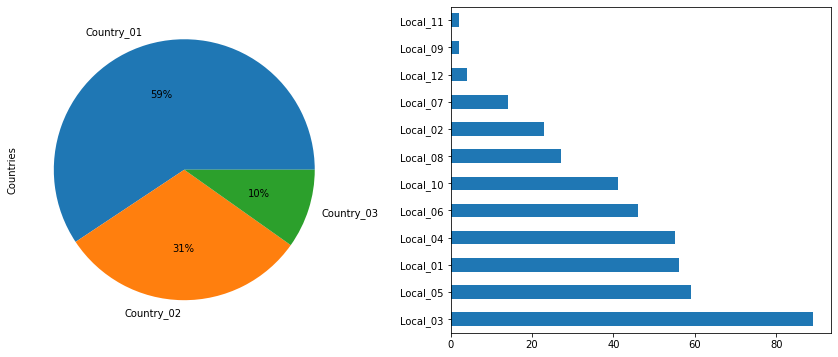

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
data['Countries'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = data['Countries'].unique(), figsize = (10, 6),ax=ax[0]);
data['Local'].value_counts().plot(kind = 'barh',  figsize = (15, 6),ax=ax[1]);
plt.show()

### Explore distribution and possible co-relation between accidents and date

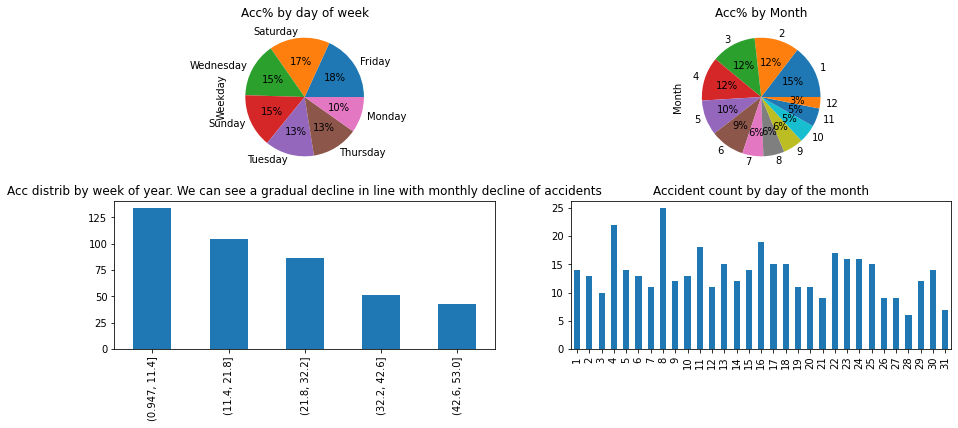

In [ ]:
fig,axs = plt.subplots(2,2)
data['Month'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = data['Month'].unique(), figsize = (10, 6),ax=axs[0,1], title="Acc% by Month");
data['Weekday'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = data['Weekday'].unique(), figsize = (10, 6),ax=axs[0,0], title="Acc% by day of week");
data['WeekofYear'].value_counts(bins=5).plot(kind = 'bar',  figsize = (15, 6),ax=axs[1,0], title="Acc distrib by week of year. We can see a gradual decline in line with monthly decline of accidents");
data['Day'].value_counts().sort_index(ascending=True).plot(kind = 'bar',  figsize = (15, 6),ax=axs[1,1], title="Accident count by day of the month");
plt.show()

- We see a difference of 8% in accidents between Monday and Friday. This could be due to accidents caused due to workers hurrying to finish the job for the weekend.
- The accidents are most in the first *four* months and gradually decreases to half by July. By December, the number of accidents have fallen to 3% as compared to 15% in January (Evidenced also by week of year distribution)
- If we consider the sudden spike of accidents on the 4th and 8th day of the month as outliers, we can see a curve building-up to a peak mid-month before gradually receding.


### Reasoning behind country_01 having highest accidents (seen earlier)

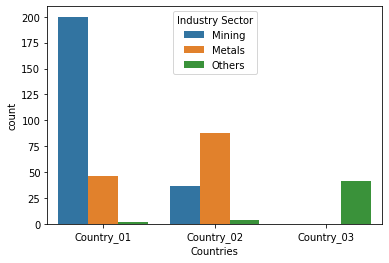

In [ ]:
sns.countplot(x="Countries", data=data,hue="Industry Sector");

Country_01 has the highest number of mining industry, this could be the reason for the higher distribution of accidents in that country.

In [ ]:
cols = list(set(data.columns.tolist())-set(['Date','Description']))
print(cols)

['Countries', 'Industry Sector', 'Critical Risk', 'Accident Level', 'Month', 'Potential Accident Level', 'Day', 'Local', 'Genre', 'Employee or Third Party', 'Weekday', 'WeekofYear']


In [ ]:

data[cols].describe(exclude=[np.number]).T

,count,unique,top,freq
Countries,418,3,Country_01,248
Industry Sector,418,3,Mining,237
Critical Risk,418,33,Others,229
Accident Level,418,5,I,309
Potential Accident Level,418,6,IV,141
Local,418,12,Local_03,89
Genre,418,2,Male,396
Employee or Third Party,418,3,Third Party,185
Weekday,418,7,Thursday,76


Also, Country_01 has highest distribution of accidents because 'Mining' value of 'Industry Sector' column contributes to nearly 50% of the dataset resulting in the imbalance.

### Other inferences on the dataset's distribution

- Accident Level I is the highest kind of accident accounting for 309 out of the 418 rows (73%)
- Male being the highest affected workers accounting for 396 out of 418 incidents. This is due to the nature of the industry sectors considered here being male dominated.
- More than 50% of the critical risk is categories as Others. Hence, a single point of failure is not evident.

### Analysis of Description

For the purposes of chat interface, description would be the main input from the user to assess risk.

Other, inputs can either be automatically retrieved such as date or asked from the user

Thus it is important to analyse the characteristics of the description

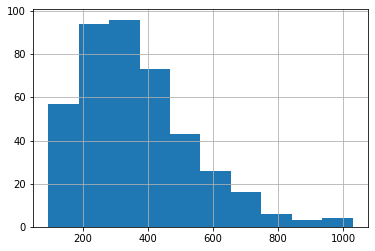

In [ ]:
data['Description'].str.len().hist();

The majority length of the description falls between 200 to 400 words.

In [ ]:
descriptions = "";
for d in data['Description']:
  descriptions = descriptions + d.lower()

In [ ]:
descriptions = descriptions.split(' ')

In [ ]:
descriptions_woso= ""

In [ ]:

for word in descriptions:
  if word not in nlp.Defaults.stop_words:
    descriptions_woso += " "+word

In [ ]:
descriptions_woso

' removing drill rod jumbo 08 maintenance, supervisor proceeds loosen support intermediate centralizer facilitate removal, seeing mechanic supports end drill equipment pull hands bar accelerate removal this, moment bar slides point support tightens fingers mechanic drilling bar beam jumbo.during activation sodium sulphide pump, piping uncoupled sulfide solution designed area reach maid. immediately use emergency shower directed ambulatory doctor later hospital. note: sulphide solution = 48 grams / liter.in sub-station milpo located level +170 collaborator excavation work pick (hand tool), hitting rock flat beak, bounces hitting steel tip safety shoe metatarsal area \u200b\u200bthe left foot collaborator causing injury.being 9:45 am. approximately nv. 1880 cx-695 ob7, personnel begins task unlocking soquet bolts bhb machine, penultimate bolt identified hexagonal head worn, proceeding mr. cristóbal - auxiliary assistant climb platform exert pressure hand "dado" key, prevent coming bolt; 

In [ ]:
from collections import Counter
counter = Counter(descriptions_woso.split(' '))
counter.most_common(10)

[('causing', 166),
 ('right', 152),
 ('left', 150),
 ('operator', 116),
 ('hand', 110),
 ('employee', 110),
 ('time', 99),
 ('-', 84),
 ('moment', 67),
 ('activity', 65)]

We tried to get the most common action which is causing the injury, but conerting to small-case, tokenizing, removing the stopwords alone did not give us any tangible insight.

In [ ]:

descriptions = "";
for d in data['Description']:
  descriptions = descriptions + d.lower()
descp = nlp(descriptions) #Apply spacy nlp pipeline

In [ ]:
nouns = []; verbs=[];
for w in descp:
  if w.tag_ == 'NN':   #get the nouns
    nouns.append(w)
  elif w.tag_ == 'VB':  # get the action words(verbs)
    verbs.append(w)

In [ ]:
print(len(verbs))
print(len(nouns))

503
7078


In [ ]:
# Group and sort by descending order the most common words --- TODO: look at Counter() documentation
counter = Counter([word for word in verbs])
for word,count in counter.most_common():
  print(word,":",count)

loosen : 1
facilitate : 1
pull : 1
accelerate : 1
reach : 1
note : 1
climb : 1
exert : 1
prevent : 1
loosen : 1
unclog : 1
turn : 1
verify : 1
raise : 1
manipulate : 1
compress : 1
evacuate : 1
go : 1
try : 1
unclog : 1
proceed : 1
remove : 1
increase : 1
position : 1
reach : 1
remove : 1
open : 1
open : 1
move : 1
enforce : 1
enter : 1
hold : 1
place : 1
chute : 1
displace : 1
unload : 1
verify : 1
stop : 1
unscrew : 1
move : 1
verify : 1
use : 1
take : 1
release : 1
move : 1
come : 1
tie : 1
hold : 1
notice : 1
notice : 1
take : 1
take : 1
wash : 1
be : 1
press : 1
open : 1
move : 1
place : 1
be : 1
remove : 1
level : 1
fall : 1
grab : 1
verify : 1
slip : 1
hit : 1
remove : 1
make : 1
unload : 1
notice : 1
chute : 1
supervise : 1
tie : 1
back : 1
grating- : 1
release : 1
have : 1
open : 1
open : 1
become : 1
slip : 1
strike : 1
identify : 1
pierce : 1
place : 1
be : 1
remove : 1
identify : 1
pull : 1
lay : 1
obstruct : 1
section : 1
direct : 1
climb : 1
carry : 1
perform : 1
rolando 

Generate word clouds to know the frequent occurring words among verbs, nouns. noun-chunks, bi-grams

(To avoid clutter of stop-words, we are using a pre-processed text of descriptions)

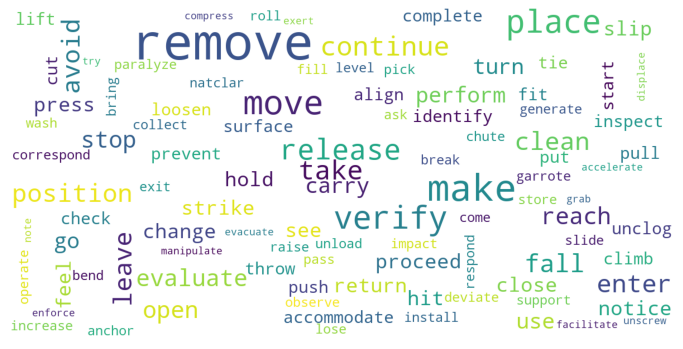

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
verbsCloud=wordcloud.generate(str(verbs))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(verbsCloud)
plt.show()

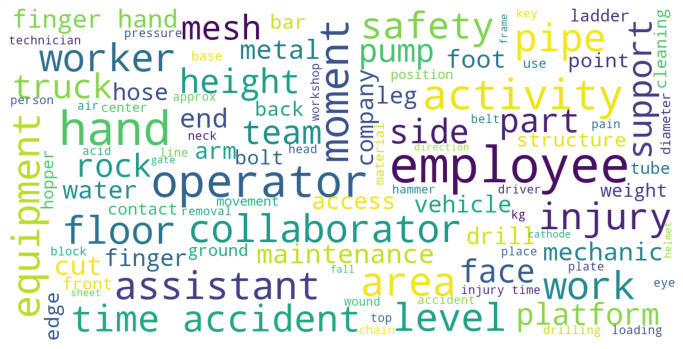

In [ ]:
nounsCloud=wordcloud.generate(str(nouns))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(nounsCloud)
plt.show()

In [ ]:
descriptions_woso = ""
for word in descriptions.split(' '):
  if word not in nlp.Defaults.stop_words:
    descriptions_woso += " "+word

In [ ]:
desp_doc = nlp(descriptions_woso)
noun_chunks = list(desp_doc.noun_chunks)

In [ ]:
ngram1 = []
for n in noun_chunks:
  ngram1.append(n.text)
converter = lambda x: x.replace(' ', '_')
ngram1 = list(map(converter, ngram1))

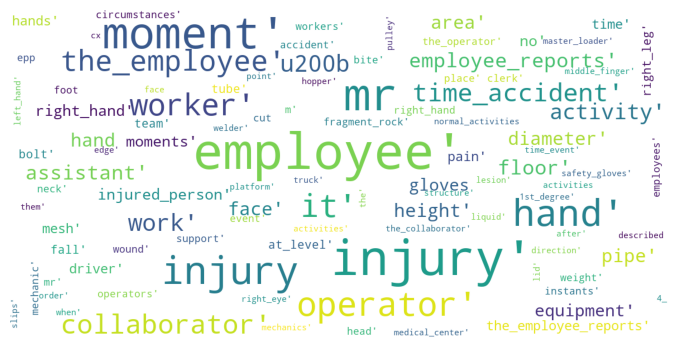

In [ ]:
nounChunkWordCloud=wordcloud.generate(str(ngram1))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(nounChunkWordCloud)
plt.show()

In [ ]:
#!pip install textacy

In [ ]:

bigrams = list(textacy.extract.ngrams(desp_doc, 2, min_freq=5))
print(bigrams)

[drill rod, area ​​the, left foot, left hand, right foot, causing injury, left hand, generating injury, kg weight, area ​​the, split set, causing injury, circumstances workers, workers company, right hand, causing injury, right leg, injury left, drilling machine, n °, left leg, right hand, transferred medical, master loader, fragment rock, hits right, 15 kg, right knee, left leg, split set, left hand, roof work, right hand, causing injury, time accident, 10 cm, 5 cm, finger right, right hand, time accident, worker wearing, wearing safety, transferred medical, medical center, medical center, master loader, 10 cm, left foot, causing injury, little finger, finger left, left hand, rotation unit, hit right, right hand, time accident, right hand, index finger, finger right, right hand, time accident, circumstances workers, workers company, piece rock, time accident, circumstances workers, workers company, piece rock, time accident, injury left, 15 kg, middle finger, right hand, causing injur

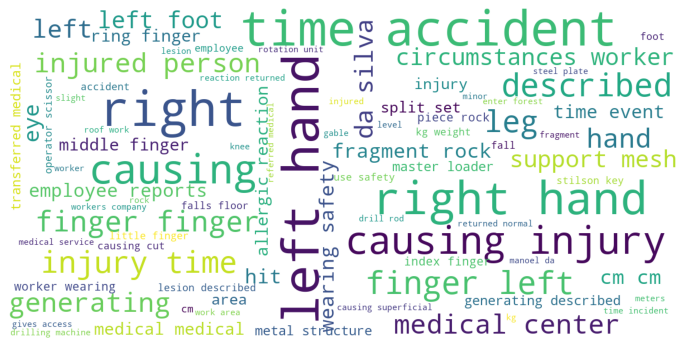

In [ ]:
bigramWordCloud=wordcloud.generate(str(bigrams))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(bigramWordCloud)
plt.show()

[drill rod, area ​​the, left foot, left hand, right foot, causing injury, left hand, generating injury, kg weight, area ​​the, split set, causing injury, circumstances workers, workers company, right hand, causing injury, right leg, injury left, drilling machine, n °, left leg, right hand, transferred medical, master loader, fragment rock, hits right, 15 kg, right knee, left leg, split set, left hand, roof work, right hand, causing injury, time accident, 10 cm, 5 cm, finger right, right hand, time accident, worker wearing, wearing safety, transferred medical, medical center, medical center, master loader, 10 cm, left foot, causing injury, little finger, finger left, left hand, rotation unit, hit right, right hand, time accident, right hand, index finger, finger right, right hand, time accident, circumstances workers, workers company, piece rock, time accident, circumstances workers, workers company, piece rock, time accident, injury left, 15 kg, middle finger, right hand, causing injur

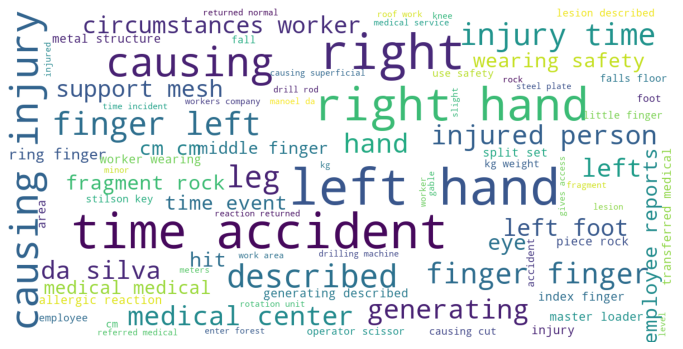

In [ ]:
trigrams = list(textacy.extract.ngrams(desp_doc, 2, min_freq=5))
print(trigrams)
trigramWordCloud=wordcloud.generate(str(trigrams))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(trigramWordCloud)
plt.show()

## 3. Create features/embeddings for our dataset

In [ ]:
desp_doc

 removing drill rod jumbo 08 maintenance, supervisor proceeds loosen support intermediate centralizer facilitate removal, seeing mechanic supports end drill equipment pull hands bar accelerate removal this, moment bar slides point support tightens fingers mechanic drilling bar beam jumbo.during activation sodium sulphide pump, piping uncoupled sulfide solution designed area reach maid. immediately use emergency shower directed ambulatory doctor later hospital. note: sulphide solution = 48 grams / liter.in sub-station milpo located level +170 collaborator excavation work pick (hand tool), hitting rock flat beak, bounces hitting steel tip safety shoe metatarsal area ​​the left foot collaborator causing injury.being 9:45 am. approximately nv. 1880 cx-695 ob7, personnel begins task unlocking soquet bolts bhb machine, penultimate bolt identified hexagonal head worn, proceeding mr. cristóbal - auxiliary assistant climb platform exert pressure hand "dado" key, prevent coming bolt; moments col

In [ ]:
# clean descriptions
import re
data['Description'].replace("\d+", regex=True, inplace = True)
print(data['Description'])

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 418, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
dcp = list(data['Description'])
vectorizer = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(1,3))
X = vectorizer.fit_transform(dcp)
vectorizer.get_feature_names_out()

print(X)
print(X.shape)

  (1, 1)	1.0
  (2, 5)	0.4611661794234674
  (2, 2)	0.3833442809173155
  (2, 6)	0.40413737163862945
  (2, 4)	0.412549542459715
  (2, 1)	0.5539393261948898
  (3, 5)	0.42033023939035563
  (3, 2)	0.34939941512697026
  (3, 6)	0.3683512923255144
  (3, 4)	0.7520371427031385
  (4, 8)	0.5601597820493619
  (4, 5)	0.6370349543937293
  (4, 2)	0.5295351597911045
  (6, 6)	0.5467957371739424
  (6, 4)	0.8372660400424735
  (8, 3)	0.599983738225848
  (8, 1)	0.8000121960723705
  (9, 7)	0.5838746720023268
  (9, 6)	0.47848834351492553
  (9, 1)	0.6558500381295391
  (10, 8)	0.6603415213137274
  (10, 5)	0.7509654287842232
  (11, 5)	0.6398159332803526
  (11, 1)	0.7685281852480047
  (12, 3)	0.5971593823941347
  :	:
  (409, 6)	0.4124895457739217
  (409, 4)	0.42107556816252906
  (409, 1)	0.5653874080538058
  (410, 3)	1.0
  (411, 0)	0.7961233575789746
  (411, 2)	0.6051343648456765
  (412, 7)	0.9253322334925645
  (412, 6)	0.3791572993622329
  (413, 5)	0.7452997983794744
  (413, 4)	0.6667294882750536
  (414, 8)	0.381

In [ ]:
# TF IDF
tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names_out()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.head(3)

,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee reports,TFIDF_finger left,TFIDF_injured person,TFIDF_injury described,TFIDF_left hand,TFIDF_medical center,TFIDF_right hand,TFIDF_time accident,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.553939,0.383344,0.0,0.41255,0.461166,0.404137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#References for using Glove embeddings for accident level prediction:
https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/



TODOs?
- Since there is a imbalance in dataset, we should try using SMOTE to upsample
- Apply one-hot encoding to selected categories 

1. Create test and training data

In [ ]:
!pip install imbalanced-learn
import imblearn

In [ ]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-02-19 12:08:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-02-19 12:08:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-19 12:08:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
#https://github.com/golamSaroar/h2o-autoML/blob/master/h2o-automl.ipynb
